# 介绍创建张量的方式

In [1]:
import torch

In [2]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [3]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [ ]:
# 随机初始化学习权重是很常见的，通常使用 PRNG 的特定种子来实现结果的可重复性：

In [4]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2)  # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3)  # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [7]:
# PyTorch 张量直观地执行算术运算。相似形状的张量可以相加、相乘等。标量的运算分布在张量上：
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2  # every element is multiplied by 2
print(twos)

threes = ones + twos  # addition allowed because shapes are similar
print(threes)  # tensors are added element-wise
print(threes.shape)  # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [8]:
# 以下是可用数学运算的一小部分示例：
r = (torch.rand(2, 2) - 0.5) * 2  # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.7312,  0.0413],
        [ 0.3730, -0.2772]])

Absolute value of r:
tensor([[0.7312, 0.0413],
        [0.3730, 0.2772]])

Inverse sine of r:
tensor([[ 0.8201,  0.0413],
        [ 0.3822, -0.2809]])

Determinant of r:
tensor(-0.2181)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8726, -0.4885],
        [-0.4885,  0.8726]]),
S=tensor([0.8262, 0.2640]),
V=tensor([[-0.9927, -0.1203],
        [ 0.1203, -0.9927]]))

Average and standard deviation of r:
(tensor(0.4335), tensor(0.2171))

Maximum value of r:
tensor(0.7312)


# 我们来谈谈如何在 PyTorch 中表达模型

In [9]:
import torch  # for all things PyTorch
import torch.nn as nn  # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [10]:
class LeNet(nn.Module):

    def __init__(self):
        # 调用父类初始化方法
        super(LeNet, self).__init__()

        # 定义第一个卷积层，输入通道数为1（灰度图像），输出通道数为6，卷积核大小为5x5
        self.conv1 = nn.Conv2d(1, 6, 5)

        # 定义第二个卷积层，输入通道数为6（来自第一层的输出），输出通道数为16，卷积核大小为5x5
        self.conv2 = nn.Conv2d(6, 16, 5)

        # 全连接层，输入大小为16*5*5（来自卷积层的输出），输出大小为120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)

        # 第二个全连接层，输入大小为120，输出大小为84
        self.fc2 = nn.Linear(120, 84)

        # 输出层，输入大小为84，输出大小为10（分类数）
        self.fc3 = nn.Linear(84, 10)

    # 实际发生计算的方法
    def forward(self, x):
        # 第一个卷积层后接ReLU激活函数，然后进行2x2的最大池化操作
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))

        # 第二个卷积层后接ReLU激活函数，然后进行2x2的最大池化操作
        # 注意：此处指定池化窗口大小为2，意味着在高和宽两个维度上都是2
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        # 展平张量，从四维变为二维，准备输入全连接层
        x = x.view(-1, self.num_flat_features(x))

        # 通过第一个全连接层，接ReLU激活函数
        x = F.relu(self.fc1(x))

        # 通过第二个全连接层，接ReLU激活函数
        x = F.relu(self.fc2(x))

        # 通过输出层，得到最终的分类结果
        x = self.fc3(x)

        # 返回网络的输出
        return x

    def num_flat_features(self, x):
        # 获取除批次大小以外的所有维度大小
        size = x.size()[1:]

        # 计算所有维度的乘积，得到展平后的特征数量
        num_features = 1
        for s in size:
            num_features *= s

        # 返回展平后的特征数量
        return num_features

In [11]:
net = LeNet()
print(net)  # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)  # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)  # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[-0.0235,  0.0257, -0.0843, -0.0503,  0.0466, -0.0893,  0.0008,  0.1070,
         -0.0372, -0.0209]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


# 数据集和数据加载器

In [12]:
# 图像转换成张量
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

In [14]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170498071/170498071 [02:58<00:00, 957352.71it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data


In [15]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49473685..1.5632443].


  cat  frog   car   car


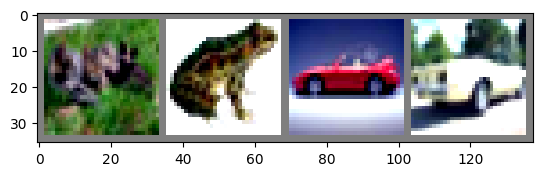

In [16]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [18]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  car   dog  ship plane


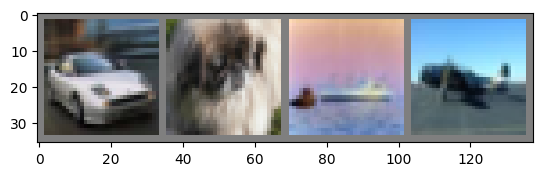

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [22]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.266
[1,  4000] loss: 1.911
[1,  6000] loss: 1.701
[1,  8000] loss: 1.579
[1, 10000] loss: 1.525
[1, 12000] loss: 1.462
[2,  2000] loss: 1.437
[2,  4000] loss: 1.378
[2,  6000] loss: 1.321
[2,  8000] loss: 1.337
[2, 10000] loss: 1.305
[2, 12000] loss: 1.283
Finished Training


In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
